# Exercício 4 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.952928900718689, 2.2933443516689783e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/FourthMixture100000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

           0         1         2         3         4
0  -1.878596 -2.283238  2.023197  4.188460 -0.568429
1  -4.770146 -3.943429  3.038668  5.987318 -1.346351
2 -12.223103 -7.609984  6.246506  9.677850 -8.188600
3  -0.947095 -3.722046  2.863110  7.628454 -1.373400
4  -1.803100  0.172723  0.859307  0.167935 -2.742939


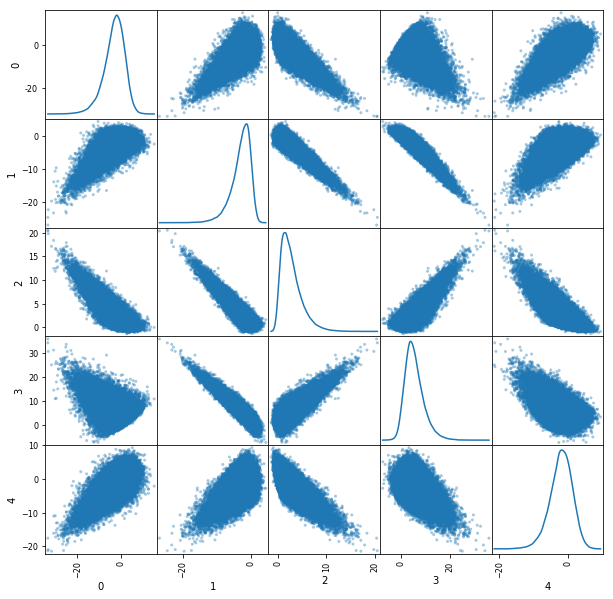

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

C:\Users\Pedro Bandeira\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.2471,1.1977,0.973,0
1,0.3131,2.4866,0.9298,0
2,0.2662,3.3062,0.9105,0
3,0.3165,1.4157,0.9571,0
4,0.0407,0.5014,0.9891,0


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, beta = 0.9998, runs = 1)

Execution time: 3.760998249053955 seconds


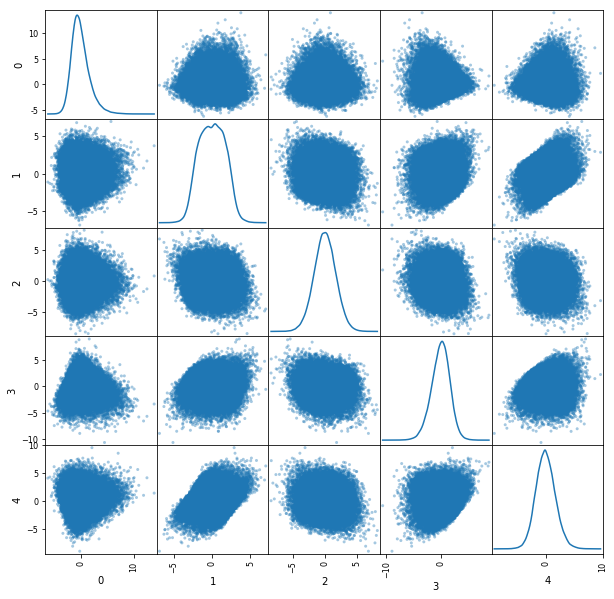

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

C:\Users\Pedro Bandeira\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.3553,1.643,0.9583,0
1,0,0.0238,0.9927,0
2,0.0409,0.0377,0.9997,6.3271e-11
3,0.305,0.1352,0.9955,1.7376e-43
4,0.206,0.055,0.9978,2.4086e-32


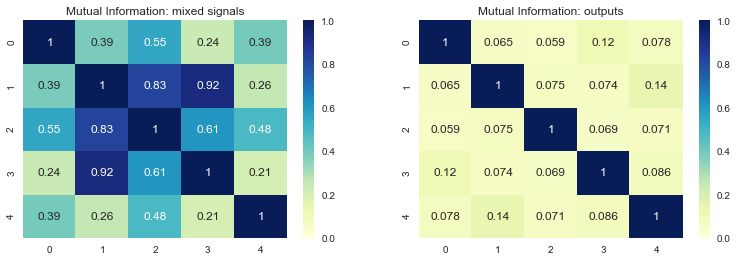

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures[-1000:], y = yNPCA[-1000:], KDE = False)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, runs  = 1) 

Execution time: 6.671778917312622 seconds


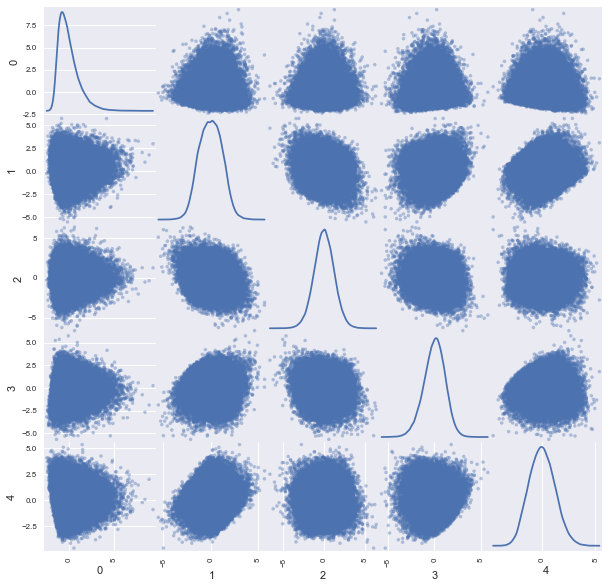

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

C:\Users\Pedro Bandeira\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.2291,3.2922,0.9144,0
1,0.0943,0.0323,0.9983,1.1382e-28
2,0.1626,0.0498,0.9991,4.2878e-21
3,0.137,0.0348,0.9967,2.3039e-38
4,0,0.0122,0.998,6.5289e-31


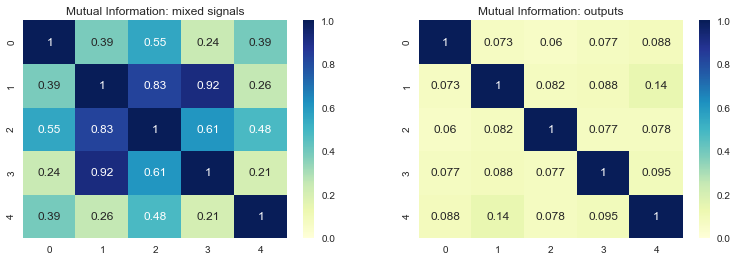

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures[-1000:], y = yFeedback[-1000:], KDE = False)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-11, runs = 1)

Execution time: 3.969594717025757 seconds


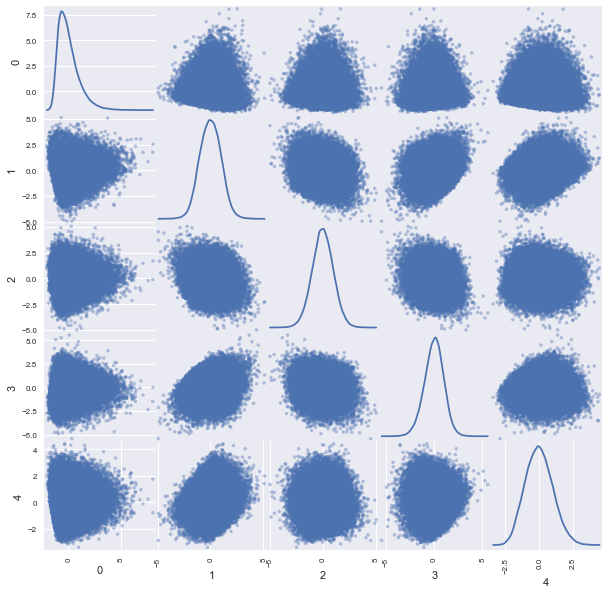

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

C:\Users\Pedro Bandeira\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.3432,3.1316,0.9155,0
1,0.186,0.0716,0.9992,1.6441e-19
2,0.0756,0.0358,0.9996,1.1867e-13
3,0.235,0.0821,0.9978,2.2248e-32
4,0,0.2296,0.9969,1.4414e-37


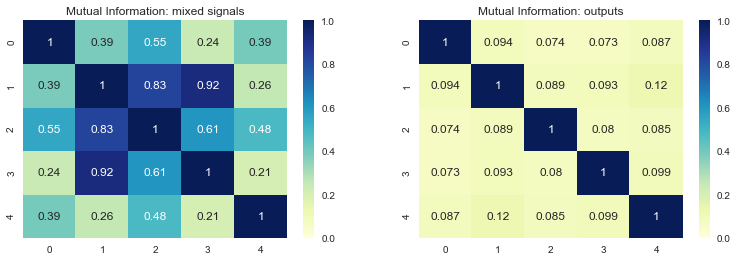

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures[-1000:], y = yFeedforward[-1000:], KDE = False)